# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El proposito del siguiente proyecto sera determinar, a raiz de los datos proporcionados, que plan genera mas ingresos para la empresa. Primero se realizara un analisis y limpieza de cada dato por separado para verificar que no existan incosistencias que puedan afectar el analisis estadistico futuro, se limpiaran los datos incluyendo, valores, nulos, duplicados y posible correccion en los tipos de datos utiliados en las tablas originalez. Posteriormente, se realizara un analisis estadistico de cada servicios para determinar el comportamiento de los usuarios de cada plan en llamadas, mensajes y uso de internet; para posteriormente analizar en su conjunto los ingresos que han generado durante el año 2018, concluyendo con la verificacion de la hipotesis estadistica de que cada plan genera ingresos diferente para la empresa y determinando cual de los dos genero mas ingresos en el año de analisis.


## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats as st 

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv("megaline_calls.csv")
internet = pd.read_csv("megaline_internet.csv")
messages = pd.read_csv("megaline_messages.csv")
plans = pd.read_csv("megaline_plans.csv")
users = pd.read_csv("megaline_users.csv")

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas

display(plans.sample(2))
display(plans.duplicated().sum())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


0

No encontre ninguna inconsistencia en los datos de esta tabla. 

## Corregir datos

## Enriquecer los datos

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprime una muestra de datos para usuarios
display(users.sample(10))
display(users.duplicated().sum())



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
401,1401,Charmain,Bryant,67,"Richmond, VA MSA",2018-08-24,ultimate,NaN
476,1476,Tammara,Dorsey,24,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-06-10,ultimate,NaN
440,1440,France,Barrett,49,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-04-16,surf,NaN
469,1469,Rory,Nixon,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,surf,NaN
91,1091,Taylor,Oliver,38,"Riverside-San Bernardino-Ontario, CA MSA",2018-05-04,ultimate,NaN
352,1352,Gavin,Galloway,48,"Seattle-Tacoma-Bellevue, WA MSA",2018-09-08,ultimate,NaN
170,1170,Olin,Adkins,18,"Pittsburgh, PA MSA",2018-09-25,surf,NaN
361,1361,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,surf,NaN
116,1116,Moriah,Yates,60,"Cincinnati, OH-KY-IN MSA",2018-08-08,surf,NaN
329,1329,Doyle,Nunez,65,"Charleston-North Charleston, SC MSA",2018-08-25,ultimate,NaN


0

Es necesario modificar los tipos de datos de las columnas reg_date y churn_date a datetime por si se requiere hacer algun calculo con ellos posteriormente. Churn_date contiene muchos datos nulos; sin embargo, es logico ya que unicamente son los usuarios que han cancelado el servicio. 

### Corregir los datos

In [7]:
users['reg_date']=pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date']=pd.to_datetime(users['churn_date'], format='%Y-%m-%d')


users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

In [8]:
columns_new_users= {'plan' : 'plan_name'}
users=users.rename(columns= columns_new_users)




## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Imprime una muestra de datos para las llamadas
display(calls.sample(10))
print(calls.duplicated().sum())



,id,user_id,call_date,duration
47507,1172_98,1172,2018-12-11,7.02
51660,1185_698,1185,2018-08-23,8.60
121915,1430_368,1430,2018-12-10,0.00
25531,1098_211,1098,2018-12-09,4.69
82149,1296_38,1296,2018-12-18,5.24
94074,1335_304,1335,2018-11-14,15.21
32004,1120_425,1120,2018-07-17,3.40
111898,1393_80,1393,2018-11-28,4.64
76159,1268_663,1268,2018-04-03,1.09
111591,1392_1,1392,2018-11-02,9.78


0


El tipo de datos que se observa es correcto con excepcion de la columna call_date que deberia ser cambiada a tipo datatime. No parecen existir valores duplicados. 

### Corregir los datos

In [11]:
calls['call_date']= pd.to_datetime(calls['call_date'], format='%Y-%m-%d')


### Enriquecer los datos

In [12]:
calls['month'] = calls['call_date'].dt.month
calls['duration'] = np.ceil(calls['duration']).astype(int)


## Mensajes

In [13]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Imprime una muestra de datos para los mensajes
display(messages.sample(10))
print(messages.duplicated().sum())



,id,user_id,message_date
64437,1412_19,1412,2018-09-14
54616,1346_119,1346,2018-06-11
37136,1247_300,1247,2018-11-19
25234,1151_77,1151,2018-09-12
2035,1027_18,1027,2018-12-11
14973,1101_30,1101,2018-12-27
38705,1254_261,1254,2018-10-20
75741,1492_87,1492,2018-10-20
73740,1474_33,1474,2018-12-28
46129,1314_17,1314,2018-12-08


0


No se observan datos nulos ni duplicados. Los tipos de datos se ven bien, unicamente se modifica el tipo de dato de la columna message_date. 

### Corregir los datos

In [15]:
messages['message_date']= pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [16]:
messages['month'] = messages['message_date'].dt.month

## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Imprime una muestra de datos para el tráfico de internet

display(internet.sample(10))
print(internet.duplicated().sum())

,id,user_id,session_date,mb_used
40726,1182_485,1182,2018-10-30,361.08
56600,1256_157,1256,2018-11-02,592.99
18999,1085_73,1085,2018-11-19,229.59
30516,1140_59,1140,2018-11-03,415.92
46223,1205_38,1205,2018-12-09,0.00
50458,1224_360,1224,2018-07-22,470.01
67193,1312_416,1312,2018-03-29,828.59
49251,1220_272,1220,2018-04-29,71.26
38333,1171_704,1171,2018-09-05,125.63
23600,1109_178,1109,2018-12-20,0.00


0


No se observan datos nulos ni duplicados. Los tipos de datos se ven bien, unicamente se modifica el tipo de dato de la columna message_date. 

### Corregir los datos

In [19]:
internet['session_date']= pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [20]:
internet['month'] = internet['session_date'].dt.month

## Estudiar las condiciones de las tarifas

In [21]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
display(plans)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario



In [22]:

# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.


calls_per_month = calls.groupby(['user_id', 'month',])['id'].count().reset_index()
display(calls_per_month.sample(5))
calls_per_month.info()


,user_id,month,id
1731,1382,6,44
2086,1460,9,59
930,1198,12,52
1279,1279,10,59
130,1036,10,71


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  2258 non-null   int64
 1   month    2258 non-null   int32
 2   id       2258 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 44.2 KB


In [23]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
display(minutes_per_month.sample(5))
minutes_per_month.info()


,user_id,month,duration
61,1016,12,837
549,1119,10,351
1773,1389,12,564
1833,1401,9,647
1103,1240,12,1119


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   2258 non-null   int64
 1   month     2258 non-null   int32
 2   duration  2258 non-null   int32
dtypes: int32(2), int64(1)
memory usage: 35.4 KB


In [24]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.


messages_per_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
display(messages_per_month.sample(5))
messages_per_month.info()


,user_id,month,id
1265,1340,8,8
242,1072,12,18
473,1131,8,33
946,1252,9,28
1228,1333,12,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  1806 non-null   int64
 1   month    1806 non-null   int32
 2   id       1806 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 35.4 KB


In [25]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

column_new = {'mb_used' : 'gb_used'}

internet_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

internet_per_month['mb_used'] = internet_per_month['mb_used']/1024

internet_per_month['mb_used'] = np.ceil(internet_per_month['mb_used']).astype(int)

internet_per_month = internet_per_month.rename(columns= column_new)

display(internet_per_month.head(10))

internet_per_month.info()

,user_id,month,gb_used
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
5,1001,12,19
6,1002,10,7
7,1002,11,19
8,1002,12,15
9,1003,12,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  2277 non-null   int64
 1   month    2277 non-null   int32
 2   gb_used  2277 non-null   int32
dtypes: int32(2), int64(1)
memory usage: 35.7 KB


In [26]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
columns_new = {'id_x': 'total_calls', 'id_y': 'total_messages'}

group_merge = calls_per_month.merge(minutes_per_month, on=['user_id','month'], how='outer')

group_merge = group_merge.merge(messages_per_month, on=['user_id','month'], how='outer')

group_merge = group_merge.merge(internet_per_month, on=['user_id','month'], how='outer')

user_spend_per_month = users.merge(group_merge, on='user_id')

user_spend_per_month = user_spend_per_month.rename(columns=columns_new)


In [27]:
user_spend_per_month['total_calls'] = user_spend_per_month['total_calls'].fillna(0)

user_spend_per_month['duration'] = user_spend_per_month['duration'].fillna(0)

user_spend_per_month['total_calls'] = user_spend_per_month['total_calls'].fillna(0)

user_spend_per_month['total_messages'] = user_spend_per_month['total_messages'].fillna(0)

user_spend_per_month['gb_used'] = user_spend_per_month['gb_used'].fillna(0)

user_spend_per_month['total_calls'] = user_spend_per_month['total_calls'].astype('int')

user_spend_per_month['total_messages'] = user_spend_per_month['total_messages'].astype('int')


In [28]:
# Añade la información de la tarifa
user_spend_per_month = user_spend_per_month.merge(plans, on='plan_name')

display(user_spend_per_month.head(10))

user_spend_per_month.info()


,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date,month,total_calls,duration,total_messages,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,16,124.0,11,2.0,1000,30720,3000,70,7,0.01,0.01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,27,182.0,30,7.0,50,15360,500,20,10,0.03,0.03
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,9,49,315.0,44,14.0,50,15360,500,20,10,0.03,0.03
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,10,65,393.0,53,22.0,50,15360,500,20,10,0.03,0.03
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,11,64,426.0,36,19.0,50,15360,500,20,10,0.03,0.03
5,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,12,56,412.0,44,19.0,50,15360,500,20,10,0.03,0.03
6,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10,11,59.0,15,7.0,50,15360,500,20,10,0.03,0.03
7,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,11,55,386.0,32,19.0,50,15360,500,20,10,0.03,0.03
8,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,12,47,384.0,41,15.0,50,15360,500,20,10,0.03,0.03
9,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,12,149,1104.0,50,27.0,50,15360,500,20,10,0.03,0.03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   first_name             2293 non-null   object        
 2   last_name              2293 non-null   object        
 3   age                    2293 non-null   int64         
 4   city                   2293 non-null   object        
 5   reg_date               2293 non-null   datetime64[ns]
 6   plan_name              2293 non-null   object        
 7   churn_date             158 non-null    datetime64[ns]
 8   month                  2293 non-null   int32         
 9   total_calls            2293 non-null   int32         
 10  duration               2293 non-null   float64       
 11  total_messages         2293 non-null   int32         
 12  gb_used                2293 non-null   float64       
 13  mes

In [29]:
# Calcula el ingreso mensual para cada usuario
# 1 gb = 1024 mb

minutes =  user_spend_per_month['duration'] - user_spend_per_month['minutes_included']

minutes[minutes<0]=0

minutes_extra = minutes * user_spend_per_month['usd_per_minute']

messages = user_spend_per_month['total_messages'] - user_spend_per_month['messages_included']

messages[messages<0]=0

messages_extra = messages * user_spend_per_month['usd_per_message']

gb = user_spend_per_month['gb_used'] - (user_spend_per_month['mb_per_month_included'] / 1024)

gb[gb<0]=0

gb_extra = gb * user_spend_per_month['usd_per_gb']

user_spend_per_month['usd_total_pay'] = user_spend_per_month['usd_monthly_pay'] + minutes_extra + messages_extra + gb_extra

display(user_spend_per_month.sample(10))

display(user_spend_per_month[user_spend_per_month['user_id']==1006])

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date,month,total_calls,...,total_messages,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,usd_total_pay
532,1113,Spencer,Powers,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,ultimate,NaT,6,54,...,44,14.0,1000,30720,3000,70,7,0.01,0.01,70.00
1724,1369,Bernard,Mckee,69,"Milwaukee-Waukesha, WI MSA",2018-10-06,surf,NaT,12,58,...,112,36.0,50,15360,500,20,10,0.03,0.03,231.86
1796,1387,Raymonde,Lowe,28,"Bridgeport-Stamford-Norwalk, CT MSA",2018-05-25,surf,NaT,10,71,...,17,21.0,50,15360,500,20,10,0.03,0.03,80.30
695,1145,Venice,Brooks,29,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-12,surf,NaT,12,55,...,61,19.0,50,15360,500,20,10,0.03,0.03,60.33
124,1033,Latoyia,Moran,28,"Oklahoma City, OK MSA",2018-05-30,ultimate,NaT,12,98,...,32,21.0,1000,30720,3000,70,7,0.01,0.01,70.00
1675,1361,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,surf,NaT,12,53,...,49,17.0,50,15360,500,20,10,0.03,0.03,40.15
1454,1317,Ruthanne,Heath,70,"Phoenix-Mesa-Chandler, AZ MSA",2018-11-11,ultimate,NaT,11,58,...,0,9.0,1000,30720,3000,70,7,0.01,0.01,70.00
1101,1232,Elidia,Russell,64,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-07,surf,NaT,12,92,...,3,18.0,50,15360,500,20,10,0.03,0.03,54.41
907,1188,Ethelene,Brock,31,"Richmond, VA MSA",2018-01-10,ultimate,NaT,12,26,...,52,20.0,1000,30720,3000,70,7,0.01,0.01,70.00
2042,1439,Moses,Cabrera,28,"Riverside-San Bernardino-Ontario, CA MSA",2018-01-04,surf,NaT,10,40,...,77,18.0,50,15360,500,20,10,0.03,0.03,50.81


,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date,month,total_calls,...,total_messages,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,usd_total_pay
19,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11,2,...,15,3.0,1000,30720,3000,70,7,0.01,0.01,70.0
20,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,12,9,...,139,32.0,1000,30720,3000,70,7,0.01,0.01,84.0


## Estudia el comportamiento de usuario

### Llamadas

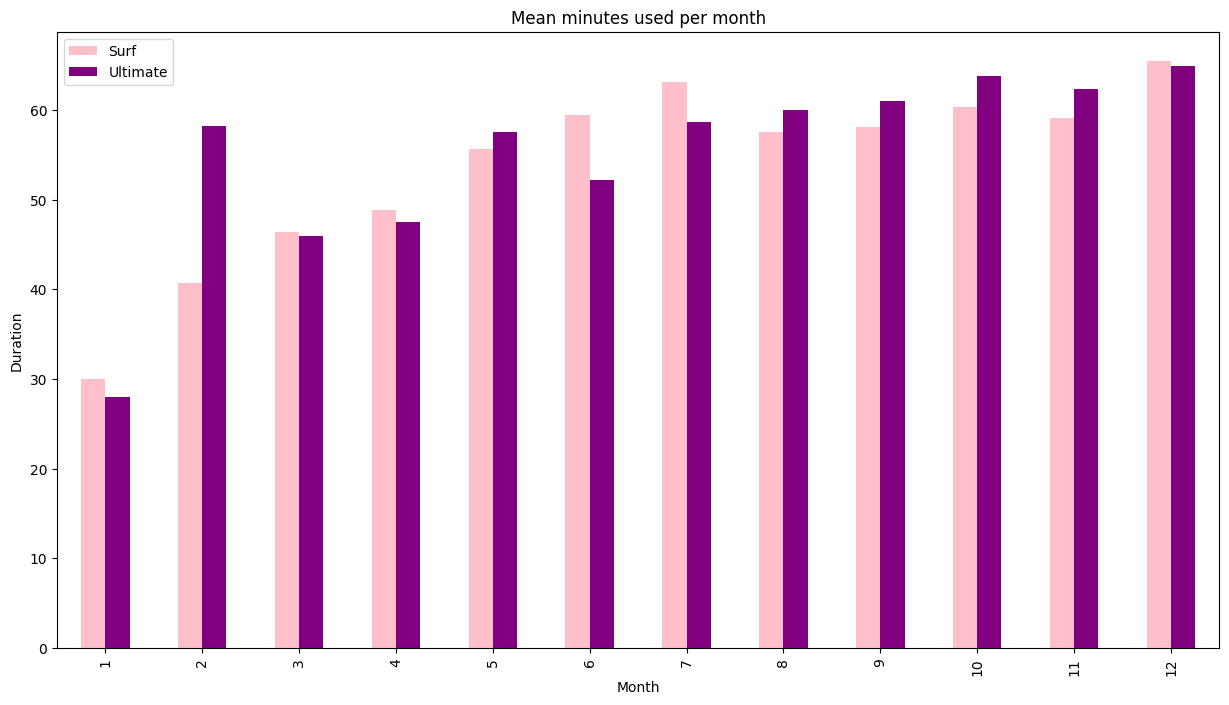

In [30]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.


pivot_mean_calls = user_spend_per_month.pivot_table(index='month',
                                                    columns='plan_name',
                                                    values='total_calls',
                                                    aggfunc='mean'
                                                    )
pivot_mean_calls.plot (kind='bar',
                       title= 'Mean minutes used per month',
                       xlabel= 'Month',
                       ylabel= 'Duration',
                       figsize= (15, 8),
                       color= ['pink', 'purple'], 
                     )
plt.legend(['Surf', 'Ultimate'])
plt.show()


Text(0, 0.5, 'Frequency')

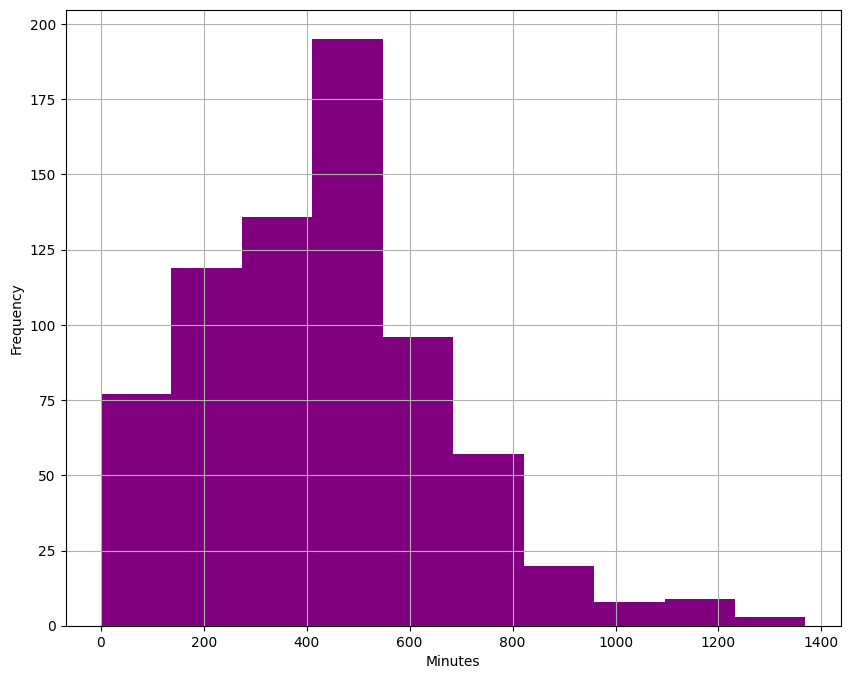

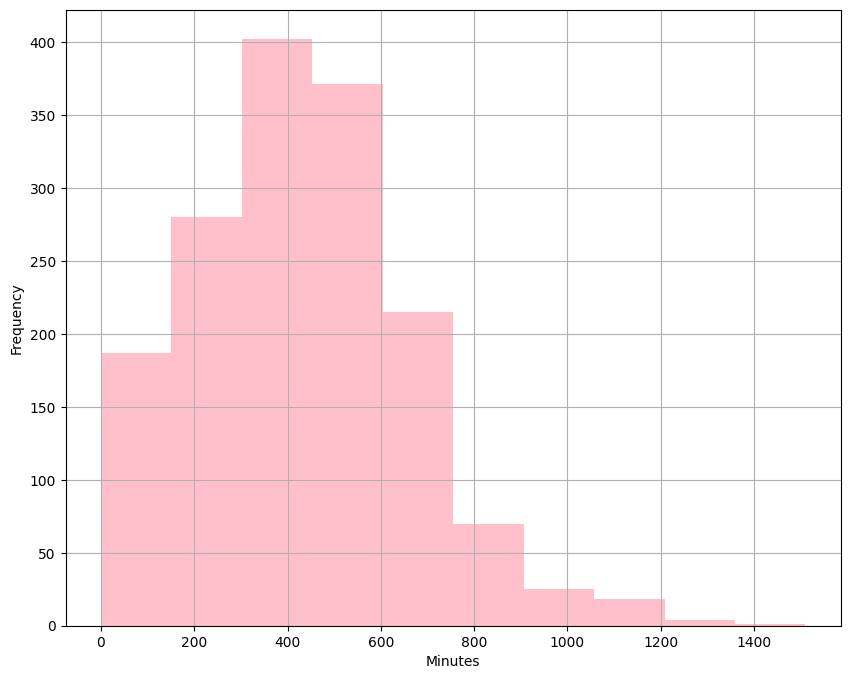

In [31]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plt.figure(figsize=(10,8))
user_spend_per_month[user_spend_per_month['plan_name'] =='ultimate']['duration'].hist(color='purple')

plt.xlabel('Minutes')
plt.ylabel('Frequency')

plt.figure(figsize=(10,8))
user_spend_per_month[user_spend_per_month['plan_name'] =='surf']['duration'].hist(color='pink')
plt.xlabel('Minutes')
plt.ylabel('Frequency')


In [32]:
# Calcula la media y la varianza de la duración mensual de llamadas.

duration_mean_surf = user_spend_per_month[user_spend_per_month['plan_name'] =='surf']['duration'].mean()

duration_var_surf = user_spend_per_month[user_spend_per_month['plan_name'] =='surf']['duration'].var()

duration_mean_ultimate = user_spend_per_month[user_spend_per_month['plan_name'] =='ultimate']['duration'].mean()

duration_var_ultimate = user_spend_per_month[user_spend_per_month['plan_name'] =='ultimate']['duration'].var()

print('La media de la duracion del plan surf es: ', duration_mean_surf)
print()

print('La varianza de la duracion del plan surf es: ', duration_var_surf)
print()

print('La media de la duracion del plan ultimate es: ', duration_mean_ultimate)
print()

print('La varianza de la duracion del plan ultimate es: ', duration_var_ultimate)

La media de la duracion del plan surf es:  428.7495232040687

La varianza de la duracion del plan surf es:  54968.27946065038

La media de la duracion del plan ultimate es:  430.45

La varianza de la duracion del plan ultimate es:  57844.46481223922


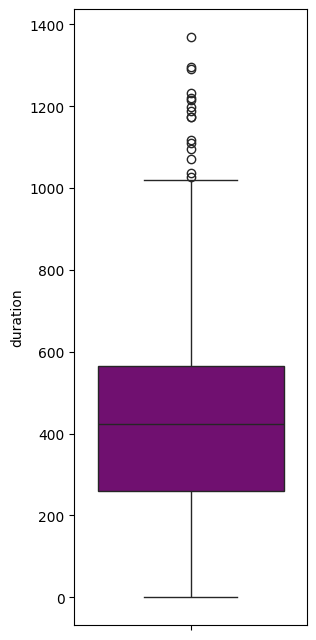

In [33]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plan_ultimate_duration = user_spend_per_month[user_spend_per_month['plan_name'] =='ultimate']['duration']

plan_surf_duration = user_spend_per_month[user_spend_per_month['plan_name'] =='surf']['duration']

plt.figure(figsize= (3, 8))
plt.title = ('Plan Ultimate Duration')
sns.boxplot(plan_ultimate_duration, color='purple')

plt.show()



In [34]:
type(plan_surf_duration)

pandas.core.series.Series

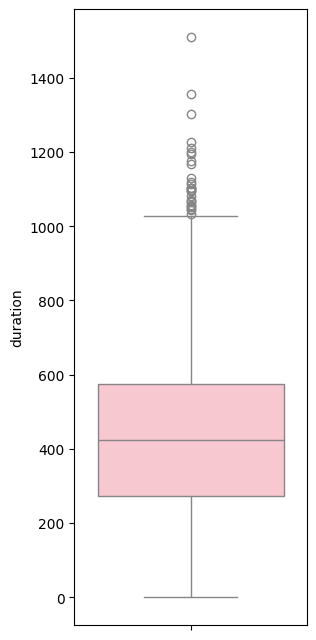

In [35]:
plt.figure(figsize= (3, 8))
plt.title = ('Plan Surf Duration')
sns.boxplot(y=plan_surf_duration, color='pink')
plt.show()


El promedio de llamadas realizadas por mes es similar para los usuarios de ambos planes. En ambos casos, la media de llamadas es más alta en los meses de enero, febrero y marzo, y luego disminuye gradualmente a lo largo del año. Sin embargo, hay una ligera diferencia en la distribución de las llamadas entre los dos tipos de planes. Los planes Surf muestran una media de llamadas ligeramente más alta en los meses de verano (junio, julio y agosto), mientras que los planes Ultimate presentan una media de llamadas ligeramente más alta en los meses de invierno (diciembre, enero y febrero).

La mayoría de los usuarios del plan Ultimate utilizan alrededor de 500 minutos al mes, mientras que la mayoría de los usuarios del plan Surf utilizan entre 250 y 450 minutos al mes. No obstante, también se observa una cantidad significativa de usuarios que exceden los 600 minutos al mes en el plan Surf. Esta masa de usuarios rebasa los minutos incluidos en su plan.

De las graficas analizadas se puede concluir que en cuanto a minutos utilizados al mes los usuarios de ambos planes tiene un comportamiento muy similar, siendo el plan surf el que mas valores atipicos presenta. 

 

### Mensajes

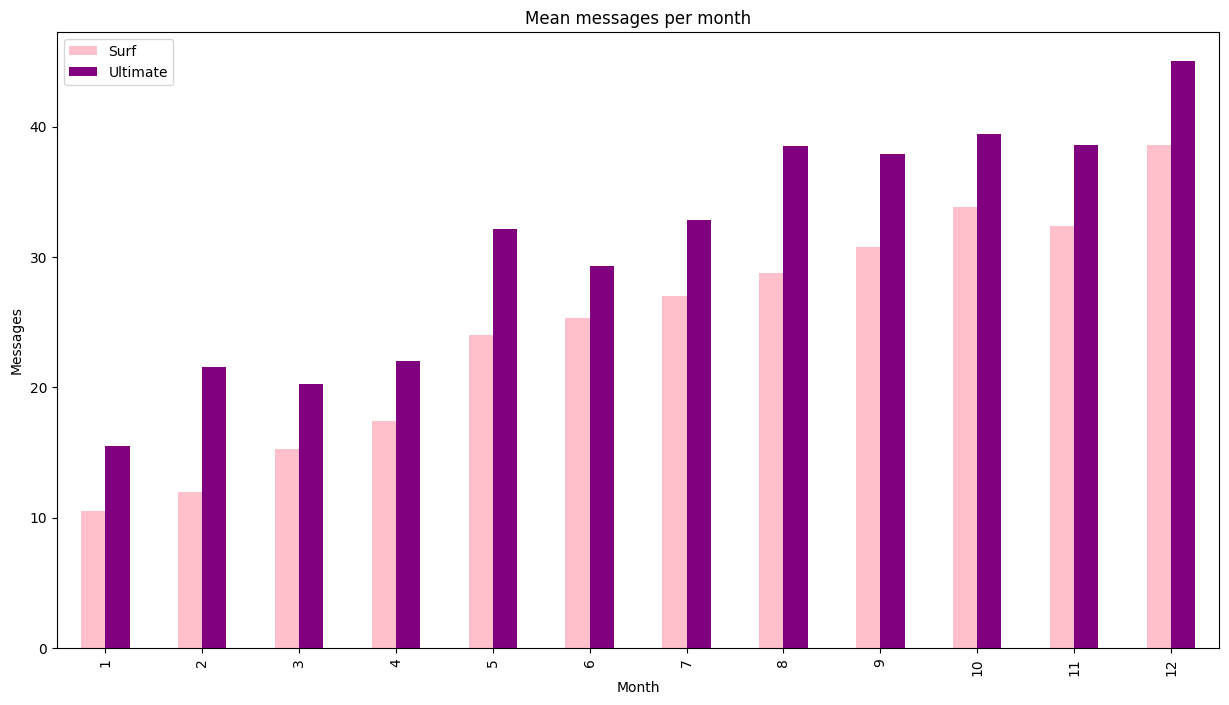

In [36]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan


pivot_mean_messages = user_spend_per_month.pivot_table(index='month',
                                                    columns='plan_name',
                                                    values='total_messages',
                                                    aggfunc='mean'
                                                    )
pivot_mean_messages.plot (kind='bar',
                       title= 'Mean messages per month',
                       xlabel= 'Month',
                       ylabel= 'Messages',
                       figsize= (15, 8),
                       color= ['pink', 'purple'], 
                     )
plt.legend(['Surf', 'Ultimate'])



In [37]:
# Calcula la media y la varianza de los mensajes mensuales.

messages_mean_surf = user_spend_per_month[user_spend_per_month['plan_name'] =='surf']['total_messages'].mean()

messages_var_surf = user_spend_per_month[user_spend_per_month['plan_name'] =='surf']['total_messages'].var()

messages_mean_ultimate = user_spend_per_month[user_spend_per_month['plan_name'] =='ultimate']['total_messages'].mean()

messages_var_ultimate = user_spend_per_month[user_spend_per_month['plan_name'] =='ultimate']['total_messages'].var()

print('La media de los mensajes del plan surf es: ', messages_mean_surf)
print()

print('La varianza de los mensajes del plan surf es: ', messages_var_surf)
print()

print('La media de los mensajes del plan ultimate es: ', messages_mean_ultimate)
print()

print('La varianza de los mensajes del plan ultimate es: ', messages_var_ultimate)


La media de los mensajes del plan surf es:  31.15956770502225

La varianza de los mensajes del plan surf es:  1126.7245219504068

La media de los mensajes del plan ultimate es:  37.55138888888889

La varianza de los mensajes del plan ultimate es:  1208.7567435481378


<Axes: ylabel='total_messages'>

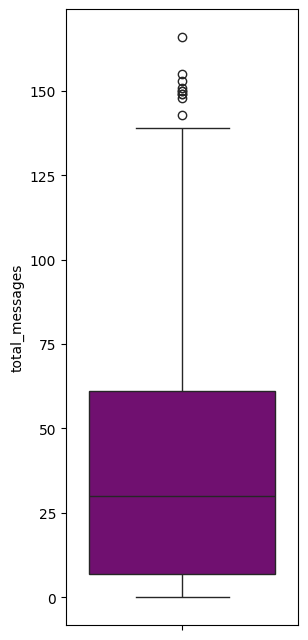

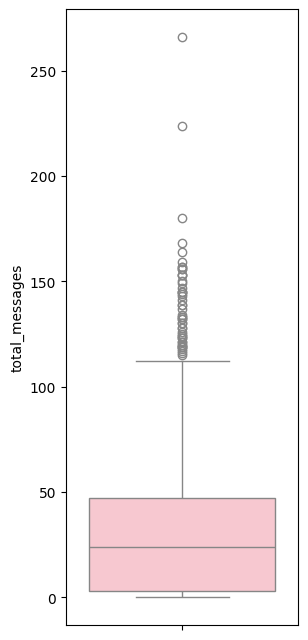

In [38]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes mensuales

plan_ultimate_messages = user_spend_per_month[user_spend_per_month['plan_name'] =='ultimate']['total_messages']

plan_surf_messages = user_spend_per_month[user_spend_per_month['plan_name'] =='surf']['total_messages']

plt.figure(figsize= (3, 8))

sns.boxplot(plan_ultimate_messages, color='purple')


plt.figure(figsize= (3, 8))

sns.boxplot(plan_surf_messages, color='pink')



En este caso, se observa claramente que los usuarios del plan Ultimate tienden a enviar muchos más mensajes que los del plan Surf en promedio. La cantidad de mensajes enviados por los usuarios de Ultimate aumenta mes a mes, alcanzando su punto máximo en diciembre. Aunque los mensajes enviados por los usuarios del plan Surf también aumentan a lo largo del año, la cantidad total es considerablemente menor en comparación con los usuarios de Surf.

Parece que ambos grupos de usuarios superan su cantidad mínima de mensajes a partir de mayo. En el plan Surf, hay muchos usuarios con comportamientos atípicos que pueden estar afectando notablemente el gráfico de barras. El promedio de usuarios del plan surf envian 31 mensajes al mes mientras que el plan ultimate 37. Por lo que puede concluirse que la mayoria de la poblacion no rebasa los mensajes incluidos en su plan, no obstante existe usuarios que disparen el grafico de barras al usar muchos mas mensajes al mes llegando a maximas de casi 300. El valor maximo de mensajes enviados en el plan ultimate es mucho mayor, alcanzando los 140.

### Internet

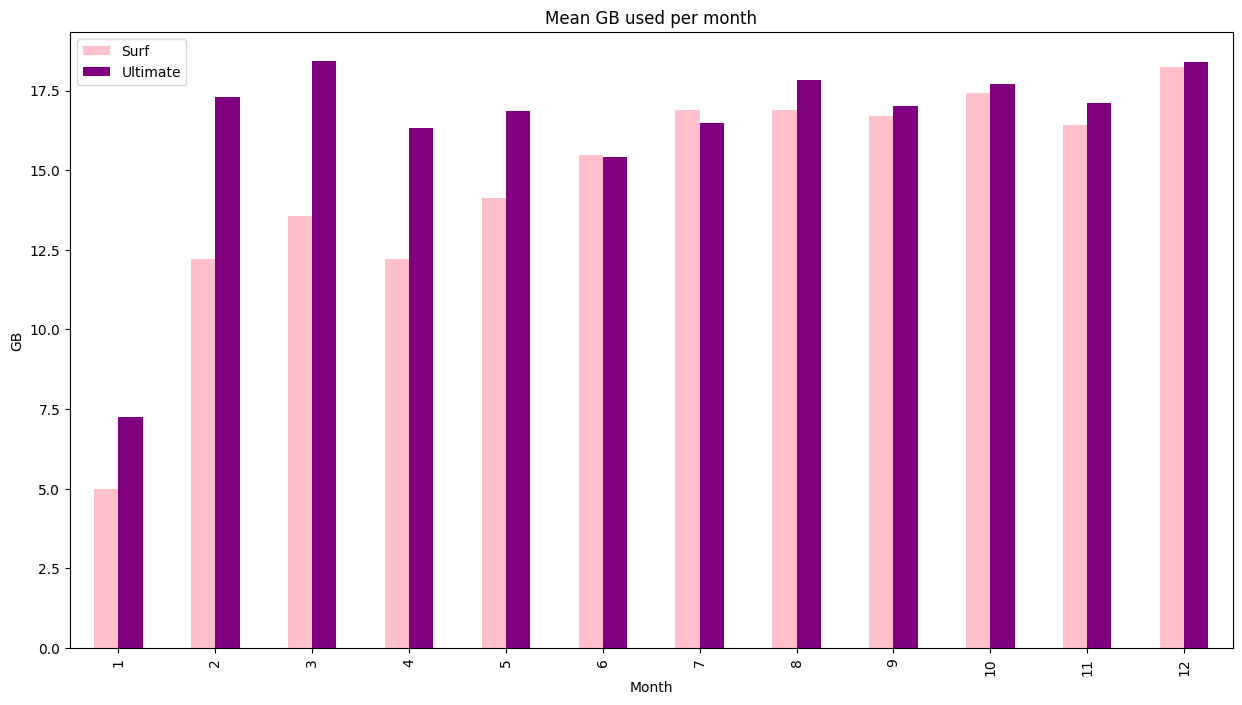

In [39]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

pivot_mean_gb = user_spend_per_month.pivot_table(index='month',
                                                    columns='plan_name',
                                                    values='gb_used',
                                                    aggfunc='mean'
                                                    )

pivot_mean_gb.plot (kind='bar',
                       title= 'Mean GB used per month',
                       xlabel= 'Month',
                       ylabel= 'GB',
                       figsize= (15, 8),
                       color= ['pink', 'purple'], 
                     )
plt.legend(['Surf', 'Ultimate'])
plt.show()



In [40]:
# Calcula la media y la varianza de los mb mensuales.
gb_mean_surf = user_spend_per_month[user_spend_per_month['plan_name'] =='surf']['gb_used'].mean()

gb_var_surf = user_spend_per_month[user_spend_per_month['plan_name'] =='surf']['gb_used'].var()

gb_mean_ultimate = user_spend_per_month[user_spend_per_month['plan_name'] =='ultimate']['gb_used'].mean()

gb_var_ultimate = user_spend_per_month[user_spend_per_month['plan_name'] =='ultimate']['gb_used'].var()

print('La media de los gb utilizados por el plan surf es: ', gb_mean_surf)
print()

print('La varianza de los gb utilizados por el plan surf es: ', gb_var_surf)
print()

print('La media de los gb utilizados por el plan ultimate es: ', gb_mean_ultimate)
print()

print('La varianza de los gb utilizados por el plan ultimate es: ', gb_var_ultimate)



La media de los gb utilizados por el plan surf es:  16.670692943420217

La varianza de los gb utilizados por el plan surf es:  61.58359983759013

La media de los gb utilizados por el plan ultimate es:  17.306944444444444

La varianza de los gb utilizados por el plan ultimate es:  58.830549760469786


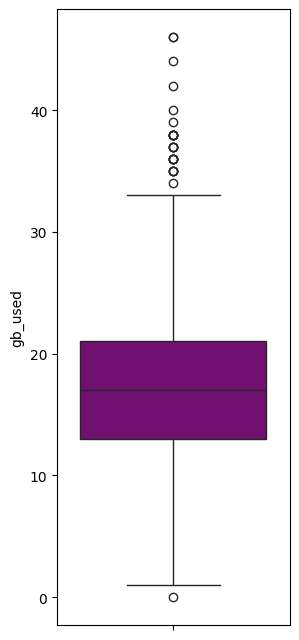

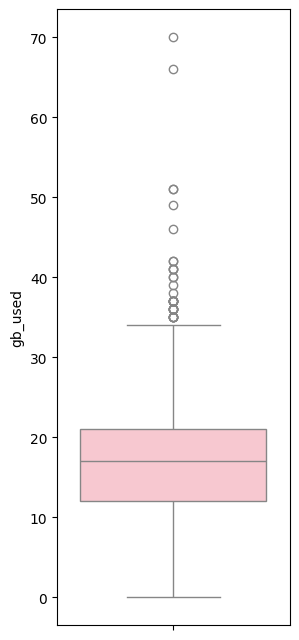

In [41]:
# Traza un diagrama de caja para visualizar la distribución de los mb mensuales

plan_ultimate_gb = user_spend_per_month[user_spend_per_month['plan_name'] =='ultimate']['gb_used']

plan_surf_gb = user_spend_per_month[user_spend_per_month['plan_name'] =='surf']['gb_used']

plt.figure(figsize= (3, 8))

sns.boxplot(plan_ultimate_gb, color='purple')


plt.figure(figsize= (3, 8))

sns.boxplot(plan_surf_gb, color='pink')
plt.show()


El promedio de los gb utilizados al mes por los usuarios del plan ultimate es mayor en todos los meses, en especial de enero a mayo. Julio es el unico mes donde el promedio utilizado por los usuarios surf es mas alto; sin embargo recordemos que ellos solamente cuentan con 15 gb al mes mientras que los usuarios ultimate cuentan con 30 gb incluidos al mes. 

Sin embargo al trazar la grafica de bigotes nuevamente notamos que los valores atipicos podrian estar modifando los datos ya que la media y la mediana rondan entre los 16 y los 17 gb utilizados al mes. Por su parte el plan surf se observa con mayor cantidad de valores atipicos llegando hasta maximos de 70 gb. Al revisar el promedio de gb utilizados al mes, notamos que el promedio de los usuarios que ultilizan el plan surf estan rebasando los gb incluidos en su plan que son 15.  

## Ingreso

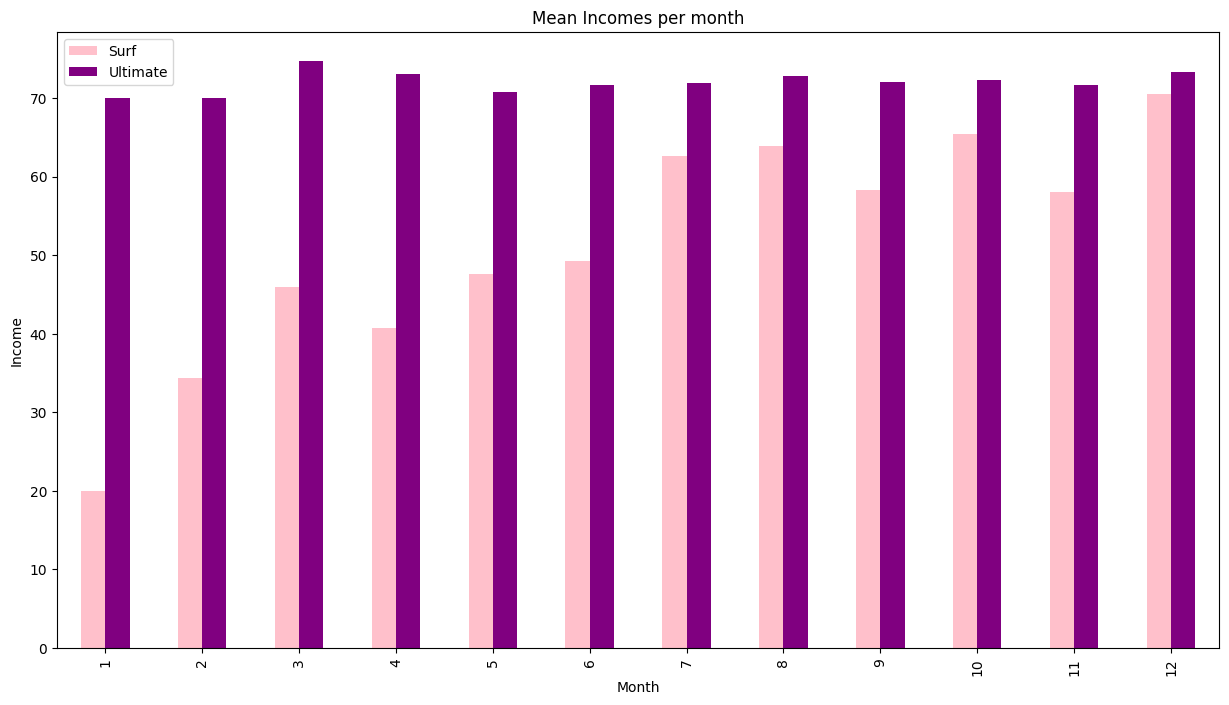

In [42]:

pivot_incomes = user_spend_per_month.pivot_table(index='month',
                                                    columns='plan_name',
                                                    values='usd_total_pay',
                                                    aggfunc='mean'
                                                    )

pivot_incomes.plot (kind='bar',
                       title= 'Mean Incomes per month',
                       xlabel= 'Month',
                       ylabel= 'Income',
                       figsize= (15, 8),
                       color= ['pink', 'purple'], 
                     )
plt.legend(['Surf', 'Ultimate'])
plt.show()


In [43]:

incomes_mean_surf = user_spend_per_month[user_spend_per_month['plan_name'] =='surf']['usd_total_pay'].mean()

incomes_var_surf = user_spend_per_month[user_spend_per_month['plan_name'] =='surf']['usd_total_pay'].var()

incomes_mean_ultimate = user_spend_per_month[user_spend_per_month['plan_name'] =='ultimate']['usd_total_pay'].mean()

incomes_var_ultimate = user_spend_per_month[user_spend_per_month['plan_name'] =='ultimate']['usd_total_pay'].var()

print('La media de los ingresos generados por el plan surf es: ', incomes_mean_surf)
print()

print('La varianza de los ingresos generados por el plan surf es: ', incomes_var_surf)
print()

print('La media de ingresos generados por el plan ultimate es: ', incomes_mean_ultimate)
print()

print('La varianza de ingresos generados por el plan ultimate es: ', incomes_var_ultimate)

La media de los ingresos generados por el plan surf es:  60.706408137317226

La varianza de los ingresos generados por el plan surf es:  3067.835152293878

La media de ingresos generados por el plan ultimate es:  72.31388888888888

La varianza de ingresos generados por el plan ultimate es:  129.8484855509195


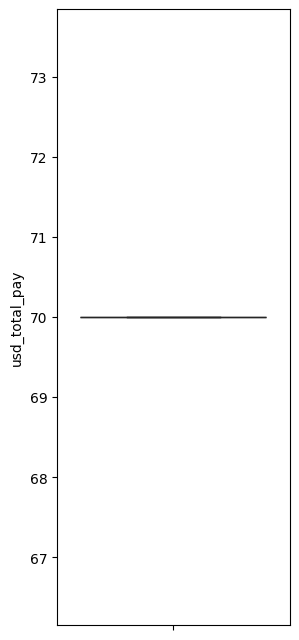

In [44]:
plan_ultimate_incomes = user_spend_per_month[user_spend_per_month['plan_name'] =='ultimate']['usd_total_pay']

plan_surf_incomes = user_spend_per_month[user_spend_per_month['plan_name'] =='surf']['usd_total_pay']

plt.figure(figsize= (3, 8))

sns.boxplot(plan_ultimate_incomes, color='purple', showfliers = False)
plt.show


plt.show()

<Axes: ylabel='usd_total_pay'>

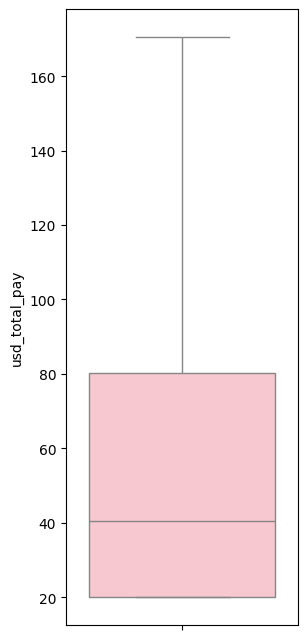

In [45]:
plt.figure(figsize= (3, 8))

sns.boxplot(plan_surf_incomes, color='pink', showfliers = False)

In [46]:
100*plan_ultimate_incomes.value_counts()/plan_ultimate_incomes.shape[0]

usd_total_pay
70.0     94.305556
91.0      0.833333
126.0     0.833333
112.0     0.694444
77.0      0.694444
84.0      0.555556
119.0     0.555556
105.0     0.555556
182.0     0.277778
140.0     0.138889
154.0     0.138889
168.0     0.138889
98.0      0.138889
133.0     0.138889
Name: count, dtype: float64

La grafica de barras parece indicar que los ingresos que proporciona el plan surf, en realacion con el costo de su plan, son mayores, lo cual encuentra logica con las otras graficas que observamos a lo largo del analisis; toda vez que los mensajes y los gb se dispararon en cuanto a su uso apartir aproximadamente del mes de abril. cuando observamos la media de ingresos mensuales de ambos planes parece confirmar esta misma tendencia ya que la media del plan surf esta en 60 dlls al mes cuando el costo del plan es de 20 esto probablemente se debe a los usuarios primero a que los usuarios con consumos atipocos modifican considerablemente los ingresos medios, por otro lados los cosos por servicio extra para el plan surf son considerablemente mas elevados que para el plan ultimate. Esto podria derivar en que, al tener menos cantidad de servicio incluido sea mas comun que los usuarios surf rebasen dichos minimos y terminen pagando mas al mes que el precio base del plan; de igual forma al tener tarifas mas altas por servicio rebasado suelen terminar pagando mas al mes. 
 
Mientras que la mieda del plan ultimate es de 72 dlls al mes lo que parece indicar que casi ningun usario de este plan rebasa el costo base del mismo. 

En ambos planes se observan demasiados valores atipicos lo cual nos indica que muchos usarios salen del promedio de dlls pagados al mes, pero particularmente se dispara en los usuarios del plan ultimate, donde estos datos atipicos impiden completamente la visualizacion de la mayoria de la poblacion.  

## Prueba las hipótesis estadísticas

In [47]:
#ho: las varianza son iguales
#h1: las varianzas no son iguales

income_ultimate = user_spend_per_month[user_spend_per_month['plan_name'] == 'ultimate']['usd_total_pay']

income_surf = user_spend_per_month[user_spend_per_month['plan_name'] == 'surf']['usd_total_pay']

alpha = 0.05

varianza = st.levene(income_ultimate, income_surf)

print('p-value:', varianza.pvalue)

if (varianza.pvalue < alpha):
    print("Se rechaza la hipotesis nula")
else:
    print("No podemos rechaza la hipotesis nula")


#Si rechazas H=, entonces equal_var = False, si no equal_Var = True

p-value: 5.028876110654919e-83
Se rechaza la hipotesis nula


In [48]:
# Prueba las hipótesis

#Ho Los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf son iguales 
#H1: Los ingresos promedio procedentes de los usuarios de los planes de llammada Ultimate y Surf son diferentes 

income_ultimate = user_spend_per_month[user_spend_per_month['plan_name'] == 'ultimate']['usd_total_pay']

income_surf = user_spend_per_month[user_spend_per_month['plan_name'] == 'surf']['usd_total_pay']

alpha = 0.05

results = st.ttest_ind(income_ultimate, income_surf, equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Se rechaza la hipotesis nula")
else:
    print("No podemos rechaza la hipotesis nula")



p-value: 3.170390548113574e-15
Se rechaza la hipotesis nula


In [49]:
#ho: las varianza son iguales
#h1: las varianzas no son iguales

ny_nj = user_spend_per_month[user_spend_per_month['city'].str.contains('NY-NJ')]['usd_total_pay']

other_city = user_spend_per_month[~user_spend_per_month['city'].str.contains('NY-NJ')]['usd_total_pay']

alpha = 0.05

varianza_ny_nj = st.levene(ny_nj, other_city)

print('p-value:', varianza_ny_nj.pvalue)

if (varianza_ny_nj.pvalue < alpha):
    print("Se rechaza la hipotesis nula")
else:
    print("No podemos rechaza la hipotesis nula")

p-value: 0.12580091109612837
No podemos rechaza la hipotesis nula


In [50]:
# Prueba las hipótesis

#Hipotesis nula: El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones

#Hipotesis alternativa: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones
ny_nj = user_spend_per_month[user_spend_per_month['city'].str.contains('NY-NJ')]['usd_total_pay']

other_city = user_spend_per_month[~user_spend_per_month['city'].str.contains('NY-NJ')]['usd_total_pay']
alpha = 0.05

results = st.ttest_ind(ny_nj, other_city, equal_var=True)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Se rechaza la hipotesis nula")
else:
    print("No podemos rechaza la hipotesis nula")


p-value: 0.043557431621342436
Se rechaza la hipotesis nula


## Conclusión general


A raíz de los puntos mencionados y teniendo en cuenta los resultados de la prueba de hipótesis estadística, se pueden generar las siguientes conclusiones:

1. Ingresos y varianza: Los ingresos promedio y la varianza de la población del plan Surf y Ultimate son significativamente diferentes. Esto sugiere que hay diferencias sustanciales en los patrones de consumo de los usuarios de ambos planes.

2. Rentabilidad del plan Surf: Los ingresos que proporciona el plan Surf parecen ser superiores en relación con el costo del plan. Esto es coherente con el aumento en el uso de mensajes y datos (GB) a partir de abril, lo que lleva a los usuarios a superar los límites de su plan y pagar tarifas adicionales. Los altos costos por servicios extra en el plan Surf podrían estar contribuyendo a estos ingresos elevados.

3. Estabilidad del plan Ultimate: Los usuarios del plan Ultimate parecen estar pagando cerca del costo base del plan (72 dólares al mes), lo que indica que la mayoría de los usuarios no superan los límites de su plan. Esto sugiere que el plan Ultimate ofrece una mayor estabilidad en los costos mensuales para los usuarios.

4. Valores atípicos: Ambos planes presentan una cantidad significativa de valores atípicos en los ingresos y el uso, especialmente en el plan Ultimate. Esto podría deberse a un pequeño grupo de usuarios con comportamientos de consumo extremos, que afectan los ingresos medios y la visualización de la distribución de la población general. La presencia de muchos valores atípicos, especialmente en el plan Ultimate, puede dificultar la interpretación de los datos y distorsionar la percepción de la mayoría de los usuarios.

En general, se observa que el plan Surf tiende a generar mayores ingresos debido a los cargos adicionales por superar los límites del plan, mientras que el plan Ultimate ofrece un costo mensual más constante para los usuarios.